# HW1: Write one ROOT macro in Python using SWAN which include the following classes you have learned 23.01.24 . 

- TCanvas

- TFile

- TH1 or TH2 or TH3

- TF1 or TF2 or TF3

- TGraph or TGraphError or TGraphMultiError

Share your code on GitHub or screenshot to this assignment. Present it next week

"hsimple.py"    -> generate random numbers and create a histogram <br>
"fillrandom.py" -> create a function and fill it with a histogram <br>
"graph.C"       -> create a points and connected line plot <br>
"gerrors.C"     -> similar to "graph.C" but add errorbars <br> <br>
ref: https://root.cern.ch/doc/master/group__tutorial__pyroot.html <br>

In [1]:
from ROOT import TCanvas, TPad, TFile
from ROOT import TH1F, TF1, TGraphErrors
from ROOT import TLatex, TLegend
from ROOT import gROOT, gBenchmark, gRandom, Double
import numpy as np

Welcome to JupyROOT 6.16/00


 FCN=12.3345 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=1.02739e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.99394e+03   3.09707e+01   4.50481e-02  -1.61754e-06
   2  Mean         2.47267e-03   6.32037e-03   1.12674e-05   5.62704e-04
   3  Sigma        9.98430e-01   4.48166e-03   2.17581e-06  -3.22096e-02


Info in <TCanvas::Print>: png file HW1.png has been created
Info in <TCanvas::Print>: pdf file HW1.pdf has been created


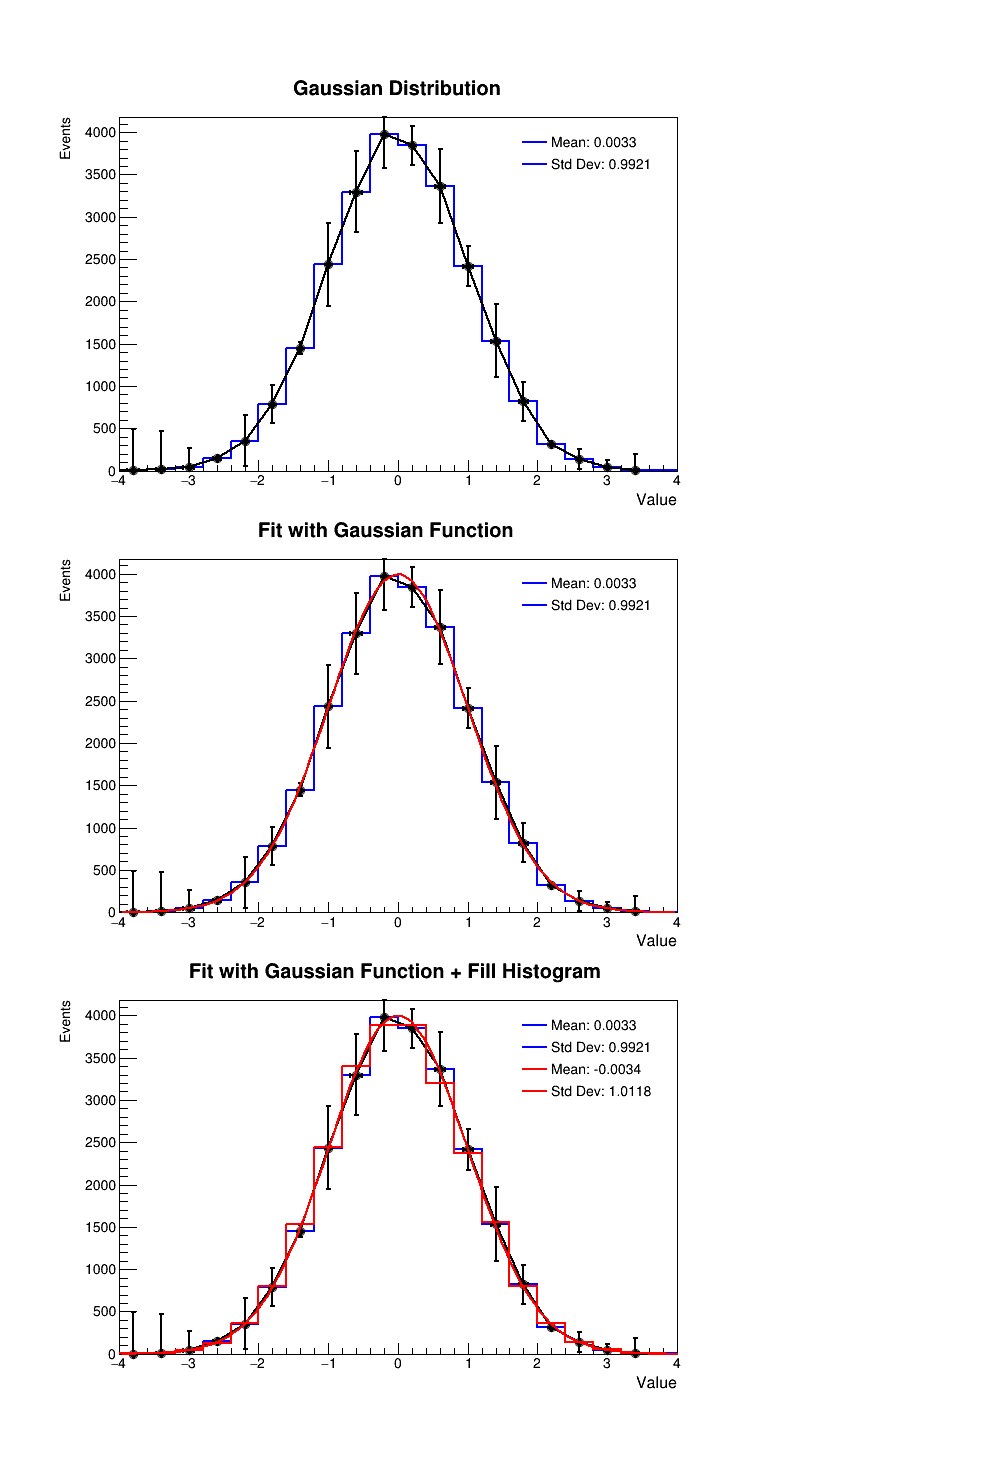

In [2]:
# Create a canvas with 3 TPads
c1 = TCanvas('c1', 'Histogram 101', 200, 10, 1000, 1500)
c1.SetFillColor(0)

pad1 = TPad('pad1', 'Histogram', 0.05, 0.65, 0.75, 0.95, 0)
pad2 = TPad('pad2', 'Fitting the histogram', 0.05, 0.35, 0.75, 0.65, 0)
pad3 = TPad('pad3', 'Comparison the histogram', 0.05, 0.05, 0.75, 0.35, 0)

pad1.Draw()
pad2.Draw()
pad3.Draw()

# Find hist_gauss.root and recreate it
hfile = gROOT.FindObject('hist_gauss.root')
if hfile:
   hfile.Close()
hfile = TFile('hist_gauss.root', 'RECREATE', 'The ROOT file for HW1')

# Create a histogram
n_bins = 20
hist = TH1F('hist', 'Gaussian Distribution', n_bins, -4, 4)

# gBenchmark.Start("1")

# using rng to create the histogram in normal distribution shape
gRandom.SetSeed(1)
rannor, rndm = gRandom.Rannor, gRandom.Rndm

x, y = Double(), Double()

for i in range(25000):
    rannor(x, y)
    hist.Fill(x)

# Create a point with errorbar at the highest bin center of each bin
bin_center, nevents = [], []
errx, erry = [], []

for j in range(n_bins):
    bin_center.append(float(hist.GetBinCenter(j)))
    nevents.append(float(hist.GetBinContent(j)))
    
    errx.append(0.1*rndm(1))
    erry.append(500*rndm(1))
    
bin_center = np.array(bin_center)
nevents = np.array(nevents)
errx = np.array(errx)
erry = np.array(erry)
                       
point = TGraphErrors(n_bins, bin_center, nevents, errx, erry)
point.SetLineColor(1)
point.SetLineWidth(2)
point.SetMarkerColor(1)
point.SetMarkerStyle(20)

# Create a gaussian function and fit with the histogram
func = TF1("func", "gaus", -5, 5)
hist.Fit(func, "RN")

# Create another histogram by fill the function
histf = TH1F('histf', 'Histogram of fitting', n_bins, -4, 4)
histf.FillRandom('func', 25000)

# Get mean and std of the two histograms
mean_hist = hist.GetMean()
std_hist = hist.GetStdDev()

mean_histf = histf.GetMean()
std_histf = histf.GetStdDev()

# For TPad titles
latex = TLatex()

# Pad1 shows the first histogram + points at the bin centers and errorbar
pad1.cd()
hist.SetLineColor(4)
hist.SetLineWidth(2)
hist.SetFillColor(0)
hist.SetTitle("")
hist.GetXaxis().SetTitleSize(0.04)
hist.GetXaxis().SetTitle("Value")
hist.GetXaxis().SetTitleSize(0.04)
hist.GetYaxis().SetTitle("Events")
hist.SetStats(0)
hist.Draw()
point.Draw("PL SAME")

latex.DrawLatexNDC(.35, .95, "Gaussian Distribution")

legend1 = TLegend(0.87, 0.84, .67, .77)
legend1.SetFillStyle(0)
legend1.SetBorderSize(0)
legend1.SetTextSize(0.035)
legend1.AddEntry(hist, "Mean: {:.4f}".format(mean_hist), "l")
legend1.AddEntry(hist, "Std Dev: {:.4f}".format(std_hist), "l")
legend1.SetY2(legend1.GetY1() + 0.1)
legend1.Draw()

# Pad2 similar to Pad1 but add the fitted function line
pad2.cd()
hist.Draw()
point.Draw("PL SAME")
func.SetLineColor(2)
func.Draw("SAME")

latex.DrawLatexNDC(.30, .95, "Fit with Gaussian Function")

legend2 = TLegend(0.87, 0.84, .67, .77)
legend2.SetFillStyle(0)
legend2.SetBorderSize(0)
legend2.SetTextSize(0.035)
legend2.AddEntry(hist, "Mean: {:.4f}".format(mean_hist), "l")
legend2.AddEntry(hist, "Std Dev: {:.4f}".format(std_hist), "l")
legend2.SetY2(legend2.GetY1() + 0.1)
legend2.Draw()

# Pad3 similar to Pad2 but add the another histogram
pad3.cd()
hist.Draw()
point.Draw("PL SAME")
histf.SetLineColor(2)
histf.SetLineWidth(2)
histf.SetFillColor(0)
histf.SetTitle("")
histf.GetXaxis().SetTitleSize(0.04)
histf.GetXaxis().SetTitle("Value")
histf.GetXaxis().SetTitleSize(0.04)
histf.GetYaxis().SetTitle("Events")
histf.Draw("SAME")
func.Draw("SAME")

latex.DrawLatexNDC(.20, .95, "Fit with Gaussian Function + Fill Histogram")

legend3 = TLegend(0.87, 0.84, .67, .67)
legend3.SetFillStyle(0)
legend3.SetBorderSize(0)
legend3.SetTextSize(0.035)
legend3.AddEntry(hist, "Mean: {:.4f}".format(mean_hist), "l")
legend3.AddEntry(hist, "Std Dev: {:.4f}".format(std_hist), "l")
legend3.AddEntry(histf, "Mean: {:.4f}".format(mean_histf), "l")
legend3.AddEntry(histf, "Std Dev: {:.4f}".format(std_histf), "l")
legend3.SetY2(legend3.GetY1() + 0.2)
legend3.Draw()

hfile.Write()

# gBenchmark.Show("1")

# Draw the canvas and save in png, pdf
c1.Modified()
c1.Update()
c1.Draw()
c1.SaveAs("HW1.png")
c1.SaveAs("HW1.pdf")